In [66]:
#make data
from sklearn.datasets import make_blobs,make_classification,make_circles

blob_datasets,blob_labels_y = make_blobs(n_samples=1000, n_features=3)
classifier_datasets,clf_labels_y = make_classification(n_samples=1000, 
    n_features=2,  
    n_informative=2, 
    n_redundant=0, 
    n_repeated=0,  
    n_classes=2,
    n_clusters_per_class=1)
circles_datasets,circles_labels_y = make_circles(n_samples=1000, noise=0.3)

In [67]:
#print graph
import matplotlib.pyplot as plt
# import numpy as np

colors = ['green','red','yellow','orange','purple']
# colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))
markers = ['o','s','<','>','1','2','3','4','5','6','7']

def print_graph(data,title,labels,clustered_data):
    plt.close("all")
    if title.find('(KMeans)') != -1 or title.find("(Mean Shift)") != -1:
        plt.scatter(data[:,0],data[:,1],c=labels)
        plt.scatter(clustered_data[:,0],clustered_data[:,1],c='blue',marker='x',s=100)
    if title.find("(DBSCAN)") != -1:
        plt.scatter(data[labels == 0][:, 0], data[labels == 0][:, 1], c=colors[0], label='Cluster 1')
        plt.scatter(data[labels == 1][:, 0], data[labels == 1][:, 1], c=colors[1], label='Cluster 2')
        plt.scatter(data[labels == -1][:, 0], data[labels == -1][:, 1], c='grey', label='Noise')
        plt.legend()
    if title.find("(GMM)") != -1 or title.find("(Agglomerative Clustering)") != -1 or title.find("(BIRCH)"):
        plt.scatter(data[:,0],data[:,1],c=labels)
    plt.title(title)
    plt.savefig(f"./plots/clusterings/{title}.png")
    plt.show()

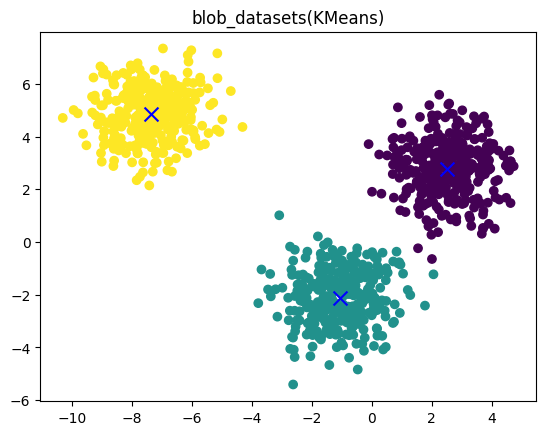

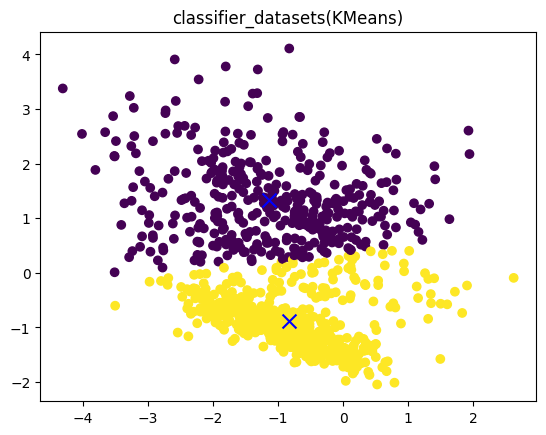

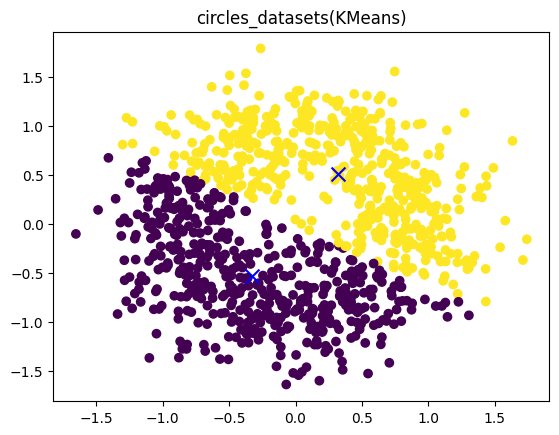

In [68]:
#K-Means
from sklearn.cluster import KMeans

def kmeans_cluster(data,clu_num,title):
    kmeans = KMeans(n_clusters=clu_num,random_state=233,n_init=10)
    kmeans.fit(data)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    print_graph(data,title,labels,cluster_centers)


kmeans_cluster(blob_datasets,3,'blob_datasets(KMeans)')
kmeans_cluster(classifier_datasets,2,'classifier_datasets(KMeans)')
kmeans_cluster(circles_datasets,2,'circles_datasets(KMeans)')

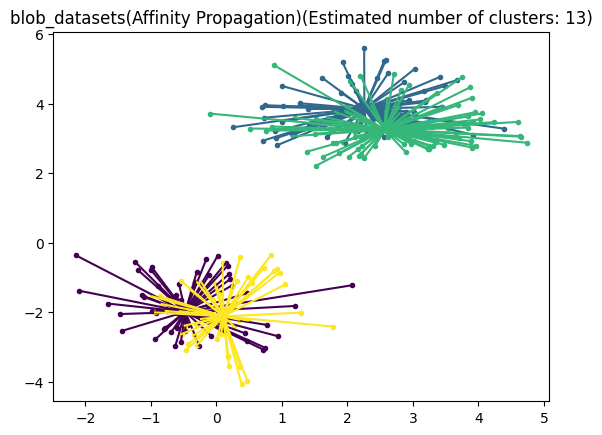

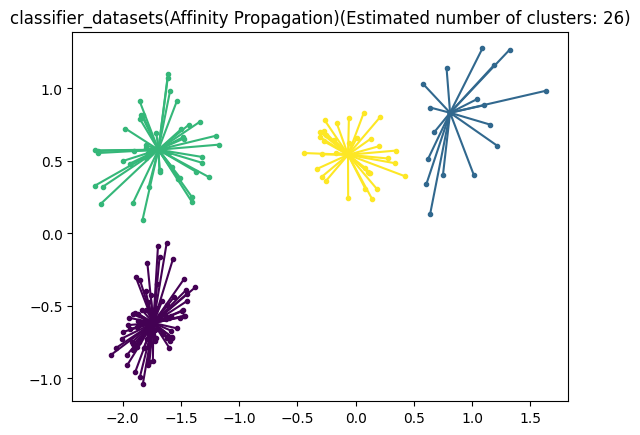

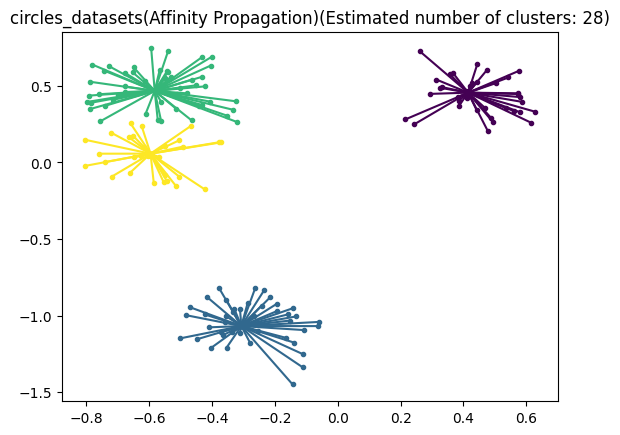

In [69]:
#Affinity Propagation
import numpy as np
from sklearn.cluster import AffinityPropagation


def affinity_propagation(data,title):
    af_clustering = AffinityPropagation(random_state=233,max_iter=500,damping=0.8)
    af_clustering.fit(data)
    labels = af_clustering.labels_
    cluster_centers_indices = af_clustering.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    plt.close("all")
    plt.figure(1)
    plt.clf()
    colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = data[cluster_centers_indices[k]]
        plt.scatter(
            data[class_members, 0], data[class_members, 1], color=col["color"], marker="."
        )
        plt.scatter(
            cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
        )
        for x in data[class_members]:
            plt.plot(
                [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
            )
    plt.title(f"{title}(Estimated number of clusters: {n_clusters_})")
    plt.savefig(f"./plots/clusterings/{title}.png")
    plt.show()

affinity_propagation(blob_datasets,"blob_datasets(Affinity Propagation)")
affinity_propagation(classifier_datasets,"classifier_datasets(Affinity Propagation)")
affinity_propagation(circles_datasets,"circles_datasets(Affinity Propagation)")

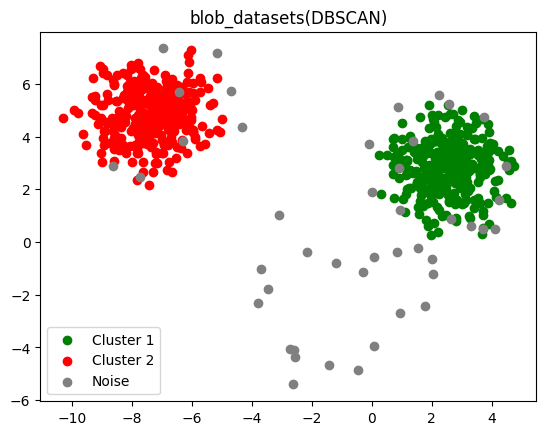

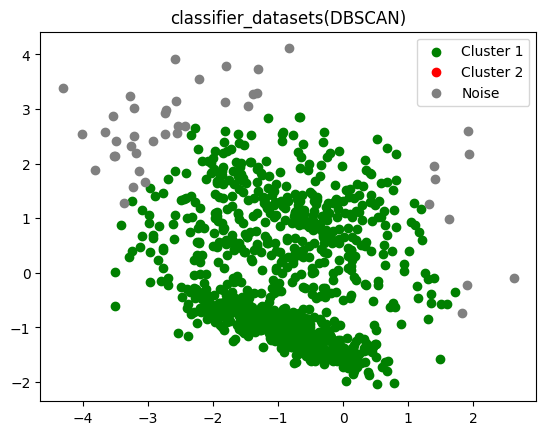

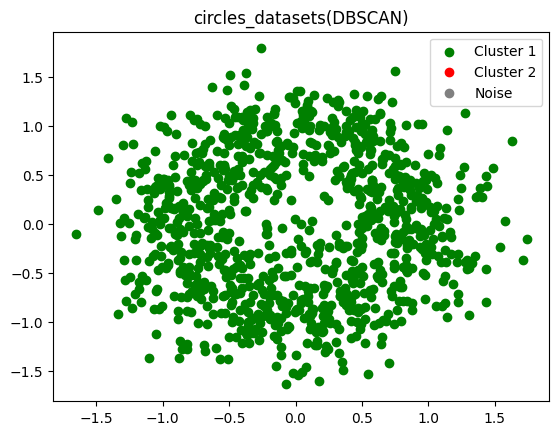

In [84]:
from sklearn.cluster import DBSCAN

def dbscan_clustering(data,eps_value,title):
    DBSCAN_clustering = DBSCAN(eps=eps_value, min_samples=200).fit(data)
    print_graph(data,title,DBSCAN_clustering.labels_,None)



dbscan_clustering(blob_datasets,2,"blob_datasets(DBSCAN)")
dbscan_clustering(classifier_datasets,1.3,"classifier_datasets(DBSCAN)")
dbscan_clustering(circles_datasets,0.8,"circles_datasets(DBSCAN)")


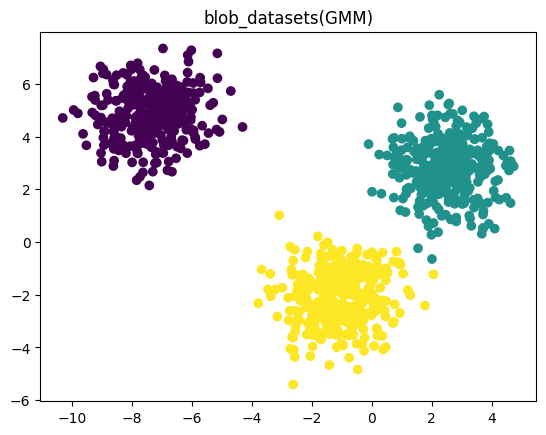

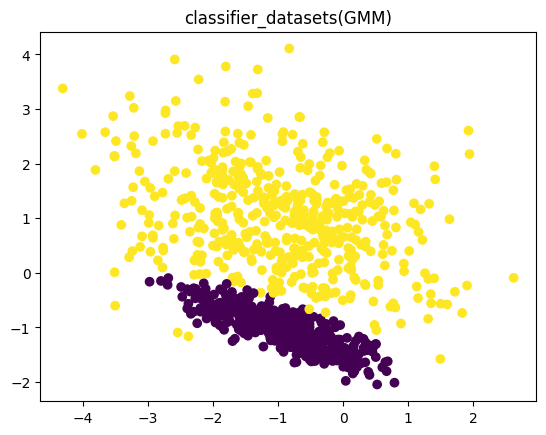

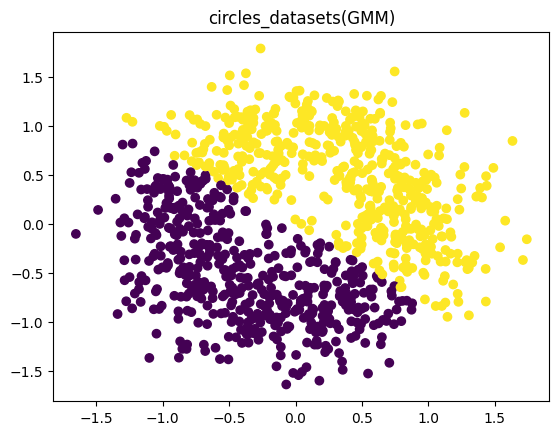

In [71]:
#Gaussian mixture
from sklearn.mixture import GaussianMixture

def gaussian_mix(data,c_num,title):
    gm_clustering = GaussianMixture(n_components=c_num, random_state=309)
    labels = gm_clustering.fit_predict(data)
    print_graph(data,title,labels,None)

gaussian_mix(blob_datasets,3,"blob_datasets(GMM)")
gaussian_mix(classifier_datasets,2,"classifier_datasets(GMM)")
gaussian_mix(circles_datasets,2,"circles_datasets(GMM)")





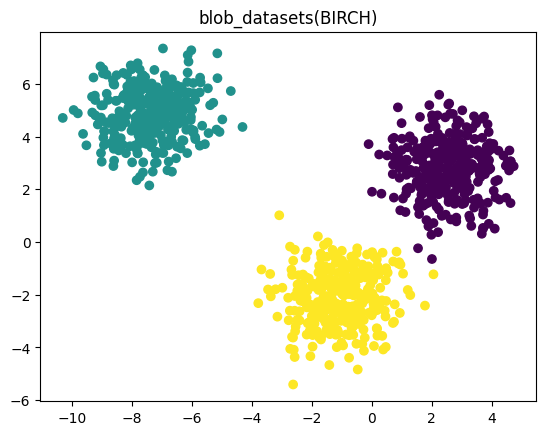

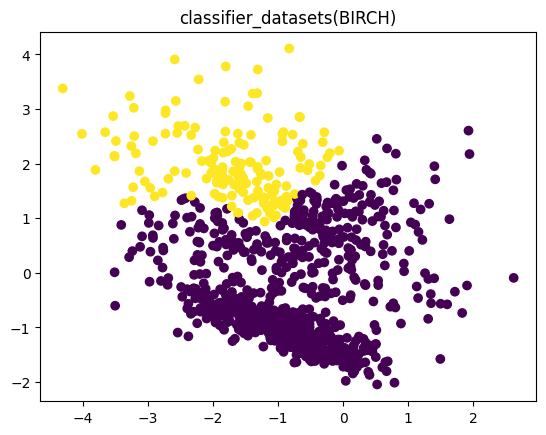

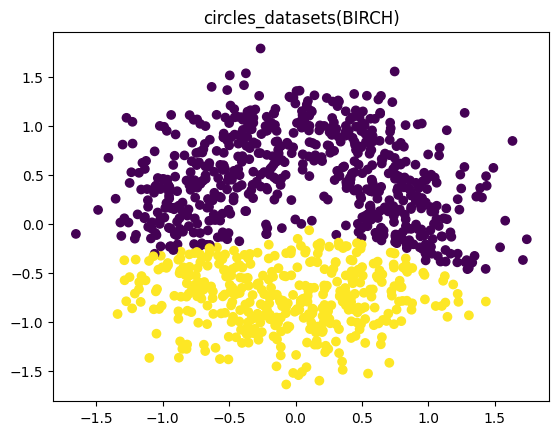

In [72]:
from sklearn.cluster import Birch

def birch_clustering(data,title,cluster_num):
    brc = Birch(n_clusters=cluster_num)
    prediction = brc.fit_predict(data)
    print_graph(data,title,prediction,None)


birch_clustering(blob_datasets,"blob_datasets(BIRCH)",3)
birch_clustering(classifier_datasets,"classifier_datasets(BIRCH)",2)
birch_clustering(circles_datasets,"circles_datasets(BIRCH)",2)

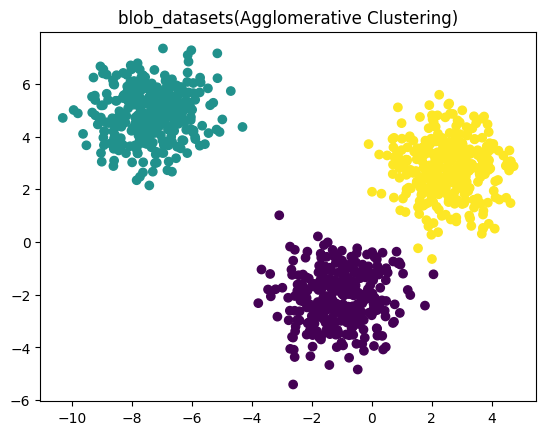

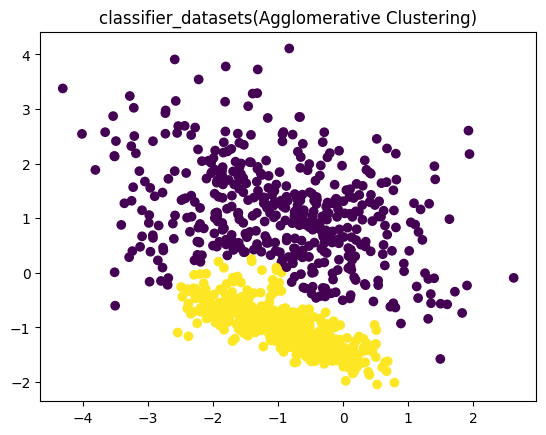

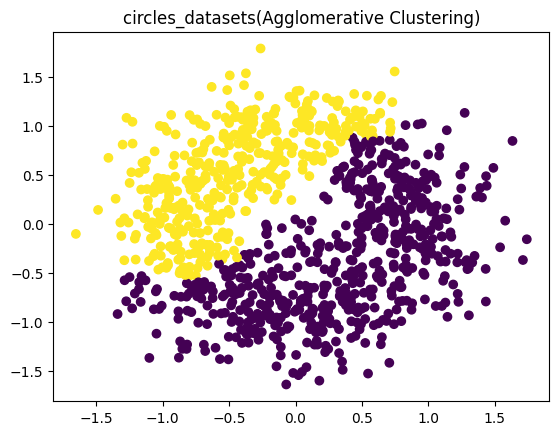

In [73]:
#AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

def agglomerative_clustering(data,title,cluster_num):
    brc = AgglomerativeClustering(n_clusters=cluster_num)
    prediction = brc.fit_predict(data)
    print_graph(data,title,prediction,None)


agglomerative_clustering(blob_datasets,"blob_datasets(Agglomerative Clustering)",3)
agglomerative_clustering(classifier_datasets,"classifier_datasets(Agglomerative Clustering)",2)
agglomerative_clustering(circles_datasets,"circles_datasets(Agglomerative Clustering)",2)




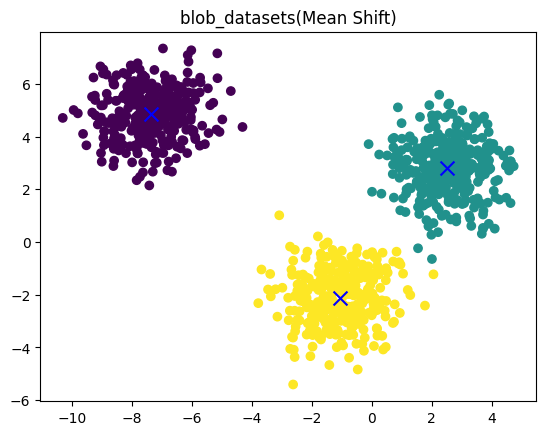

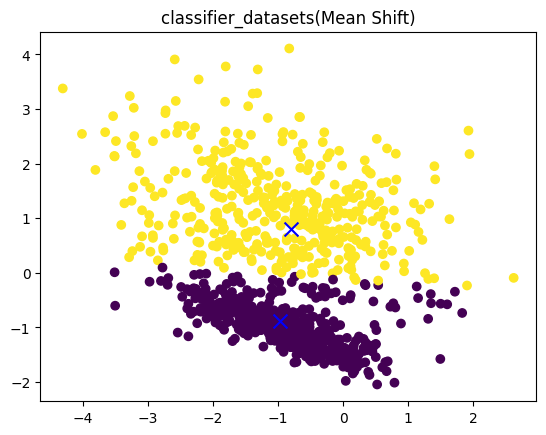

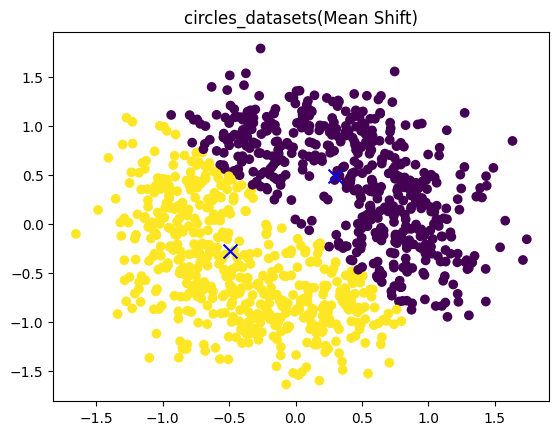

In [74]:
from sklearn.cluster import MeanShift

def mean_shift_clustering(data,title):
    ms_clustering = MeanShift().fit(data)
    labels = ms_clustering.labels_
    centers = ms_clustering.cluster_centers_
    print_graph(data,title,labels,centers)

mean_shift_clustering(blob_datasets,"blob_datasets(Mean Shift)")
mean_shift_clustering(classifier_datasets,"classifier_datasets(Mean Shift)")
mean_shift_clustering(circles_datasets,"circles_datasets(Mean Shift)")



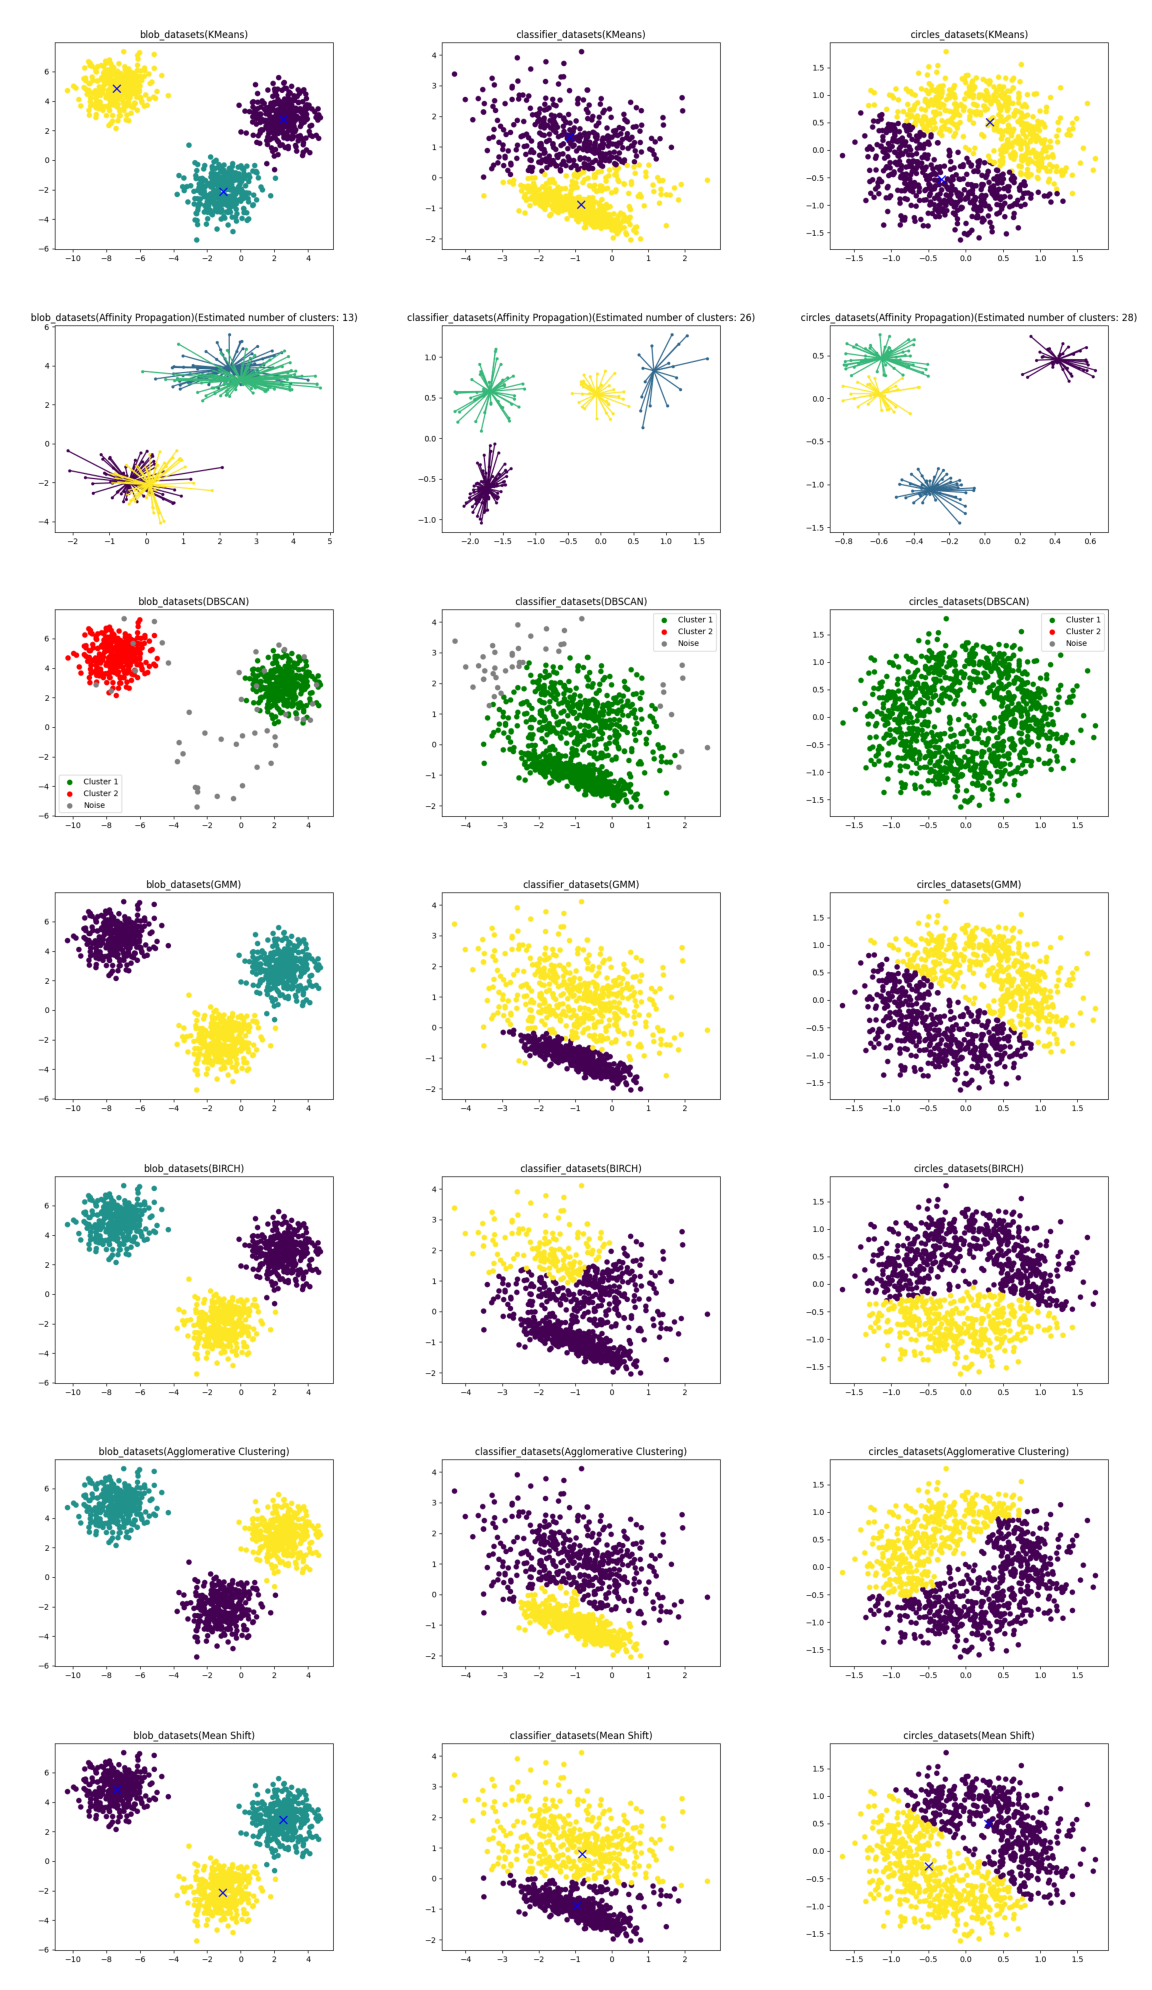

In [85]:
# draw table
import matplotlib.image as mpimg

datas = [blob_datasets,classifier_datasets,circles_datasets]
data_names = ["blob_datasets","classifier_datasets","circles_datasets"]

clusterings = ["KMeans",
        "Affinity Propagation",
        "DBSCAN",
        "GMM",
        "BIRCH",
        "Agglomerative Clustering",
        "Mean Shift"
        ]

fig, axs = plt.subplots(7, 3, figsize=(12, 20))

for i, c in enumerate(clusterings):
    for j, data in enumerate(datas):
        img = mpimg.imread(f"./plots/clusterings/{data_names[j]}({c}).png")  # Load the image
        axs[i, j].imshow(img)  # Display the image
        axs[i, j].axis("off")  # Hide the axes

plt.tight_layout()
plt.savefig("./clusterings.png")